<a href="https://colab.research.google.com/github/hemu2014/python-ML/blob/main/Q%E5%AD%A6%E4%B9%A0/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Reinforcement Learning
The next and final topic in this course covers *Reinforcement Learning*. This technique is different than many of the other machine learning techniques we have seen earlier and has many applications in training agents (an AI) to interact with enviornments like games. Rather than feeding our machine learning model millions of examples we let our model come up with its own examples by exploring an enviornemt. The concept is simple. Humans learn by exploring and learning from mistakes and past experiences so let's have our computer do the same.



###Terminology
Before we dive into explaining reinforcement learning we need to define a few key peices of terminology.

**Enviornemt** In reinforcement learning tasks we have a notion of the enviornment. This is what our *agent* will explore. An example of an enviornment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

**Agent** an agent is an entity that is exploring the enviornment. Our agent will interact and take different actions within the enviornment. In our mario example the mario character within the game would be our agent.

**State** always our agent will be in what we call a *state*. The state simply tells us about the status of the agent. The most common example of a state is the location of the agent within the enviornment. Moving locations would change the agents state.

**Action** any interaction between the agent and enviornment would be considered an action. For example, moving to the left or jumping would be an action. An action may or may not change the current *state* of the agent. In fact, the act of doing nothing is an action as well! The action of say not pressing a key if we are using our mario example.

**Reward** every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an enviornment. Sometimes the reward will be clear, for example if an agent performs an action which increases their score in the enviornment we could say they've recieved a positive reward. If the agent were to perform an action which results in them losing score or possibly dying in the enviornment then they would recieve a negative reward.

The most important part of reinforcement learning is determing how to reward the agent. After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropiatly such that it reaches the desired goal.



###Q-Learning
Now that we have a vague idea of how reinforcement learning works it's time to talk about a specific technique in reinforcement learning called *Q-Learning*.

Q-Learning is a simple yet quite powerful technique in machine learning that involves learning a matrix of action-reward values. This matrix is often reffered to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions) where each value at matrix[n, m] represents the agents expected reward given they are in state n and take action m. The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take at each state. The idea is that after a succesful training/learning of this Q-Table/matrix we can determine the action an agent should take in any state by looking at that states row in the matrix and taking the maximium value column as the action.

**Consider this example.**

Let's say A1-A4 are the possible actions and we have 3 states represented by each row (state 1 - state 3).

| A1  | A2  | A3  | A4  |
|:--: |:--: |:--: |:--: |
|  0  |  0  | 10  |  5  |
|  5  | 10  |  0  |  0  |
| 10  |  5  |  0  |  0  |

If that was our Q-Table/matrix then the following would be the preffered actions in each state.

> State 1: A3

> State 2: A2

> State 3: A1

We can see that this is because the values in each of those columns are the highest for those states!



###Learning the Q-Table
So that's simple, right? Now how do we create this table and find those values. Well this is where we will dicuss how the Q-Learning algorithm updates the values in our Q-Table.

I'll start by noting that our Q-Table starts of with all 0 values. This is because the agent has yet to learn anything about the enviornment.

Our agent learns by exploring the enviornment and observing the outcome/reward from each action it takes in each state. But how does it know what action to take in each state? There are two ways that our agent can decide on which action to take.
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Near the beginning of our agents learning it will mostly take random actions in order to explore the enviornment and enter many different states. As it starts to explore more of the enviornment it will start to gradually rely more on it's learned values (Q-Table) to take actions. This means that as our agent explores more of the enviornment it will develop a better understanding and start to take "correct" or better actions more often. It's important that the agent has a good balance of taking random actions and using learned values to ensure it does get trapped in a local maximum.

After each new action our agent wil record the new state (if any) that it has entered and the reward that it recieved from taking that action. These values will be used to update the Q-Table. The agent will stop taking new actions only once a certain time limit is reached or it has acheived the goal or reached the end of the enviornment.

####Updating Q-Values
The formula for updating the Q-Table after each action is as follows:
> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

- $\alpha$ stands for the **Learning Rate**

- $\gamma$ stands for the **Discount Factor**

####Learning Rate $\alpha$
The learning rate $\alpha$ is a numeric constant that defines how much change is permitted on each QTable update. A high learning rate means that each update will introduce a large change to the current state-action value. A small learning rate means that each update has a more subtle change. Modifying the learning rate will change how the agent explores the enviornment and how quickly it determines the final values in the QTable.

####Discount Factor $\gamma$
Discount factor also know as gamma ($\gamma$) is used to balance how much focus is put on the current and future reward. A high discount factor means that future rewards will be considered more heavily.

<br/>
<p>To perform updates on this table we will let the agent explpore the enviornment for a certain period of time and use each of its actions to make an update. Slowly we should start to notice the agent learning and choosing better actions. </p>



##Q-Learning Example
For this example we will use the Q-Learning algorithm to train an agent to navigate a popular enviornment from the [Open AI Gym](https://gym.openai.com/). The Open AI Gym was developed so programmers could practice machine learning using unique enviornments. Intersting fact, Elon Musk is one of the founders of OpenAI!

Let's start by looking at what Open AI Gym is.

In [ ]:
import gym   # all you have to do to import and use open ai gym!

In [ ]:
print(gym.__version__)

0.25.2


In [ ]:
!pip show gym

Name: gym
Version: 0.25.2
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: cloudpickle, gym-notices, numpy
Required-by: dopamine_rl


Once you import gym you can load an enviornment using the line ```gym.make("enviornment")```.

In [ ]:
env = gym.make('FrozenLake-v1', render_mode='human')  # we are going to use the FrozenLake enviornment

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


There are a few other commands that can be used to interact and get information about the enviornment.

In [ ]:
print(env.observation_space)
print(env.action_space)

Discrete(16)
Discrete(4)


In [ ]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


###重置环境

In [ ]:
env.reset()  # reset enviornment to default state

0

####获取一个随机动作

In [ ]:
action = env.action_space.sample()  # get a random action
print(action)

2


In [ ]:
!pip install numpy --upgrade

####env.step(action)
执行给定的动作，返回以下信息：

* new_state：执行动作后的新状态（如 1 表示向右移动后的格子）。

* reward：即时奖励（FrozenLake 中只有到达目标时 reward=1，其他情况为 0）。

* done：是否为终止状态（True 表示到达目标或掉入冰洞）。

* info：额外信息（如概率等调试数据，通常为空字典 {}）。

In [ ]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action
print(new_state)  # 新状态
print(reward)     # 即时奖励
print(done)       # 是否终止(决定下一步是否执行)
print(info)       # 额外信息

2
0.0
False
{'prob': 0.3333333333333333}


####渲染环境
.render() 是属于环境对象的一个函数。当调用时，它会生成环境当前状态的视觉表示（一个 GUI - 图形用户界面），显示代理的位置和冻结湖布局，包括 'S'（起点）、'F'（冻结）、'H'（坑）和 'G'（目标）元素。

In [ ]:
env.render()   # render the GUI for the enviornment

###Frozen Lake Enviornment
Now that we have a basic understanding of how the gym enviornment works it's time to discuss the specific problem we will be solving.

The enviornment we loaded above ```FrozenLake-v0``` is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:
- 16 states (one for each square)
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)



###Building the Q-Table
The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1', render_mode='human')
STATES = env.observation_space.n  #获取环境状态信息
ACTIONS = env.action_space.n    #获取动作信息

####构建一个Q学习表
使用numpy构建一个（states, actions）相应的0矩阵

In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values
print(Q)
print(Q.shape)
print(Q.ndim)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(16, 4)
2


###Constants
As we discussed we need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

EPISODES = 2000：训练 2000 次完整游戏（从起点到终点/冰洞）。

MAX_STEPS = 100：如果智能体在 100 步内未完成任务，强制结束当前回合。

LEARNING_RATE (α)：

* 取值范围 0 < α ≤ 1，控制新信息对 Q 值的影响。

* α=0.81 表示新信息占 81% 权重，旧 Q 值占 19%。

GAMMA (γ)：

* 取值范围 0 ≤ γ < 1，衡量未来奖励的重要性。

* γ=0.96 表示智能体更关注长期回报（接近 1 时更重视未来）。

In [ ]:
# 训练的总回合数
EPISODES = 2000 # how many times to run the enviornment from the beginning
#
## 每个回合的最大步数（防止无限循环）
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96



###Picking an Action
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [ ]:
'''
np.random.uniform(low=0.0, high=1.0, size=None)
low: 随机数的范围的下限（包含）。默认为 0.0。
high: 随机数的范围的上限（不包含）。默认为 1.0。
size: 输出的形状。如果给定整数，则返回该大小的一维数组；如果给定元组，则返回该形状的数组。默认为 None，表示返回一个单一的浮点数。
'''
print(np.random.uniform(0, 1))
print(np.random.uniform(0, 1, 3))
print(np.random.uniform(0, 1, (3,2,2)))  # 生成一个矩阵

0.2483560822932115
[0.40394046 0.57306069 0.66622558]
[[[0.00199453 0.25604968]
  [0.59810096 0.13475361]]

 [[0.76290595 0.77993781]
  [0.70525648 0.13709385]]

 [[0.31068186 0.76002014]
  [0.58822745 0.08794071]]]


epsilon 是一个动态衰减的参数，控制探索的概率：

* 初始值 0.9：表示智能体在训练初期有 90% 的概率随机选择动作（探索环境），10% 的概率选择当前 Q 表认为最优的动作（利用已有知识）。

* 后续通常会衰减：例如每回合减少 0.001，逐步降低探索比例，让智能体后期更依赖学到的策略。

In [ ]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
 # 生成一个 [0,1) 的随机数，若小于 epsilon 则随机探索
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    # 有1-epsilon的概率选择学习表， 取当前state的对应action的最大Q值的索引，也就是执行相应的动作
    #  # 选择当前状态下 Q 值最大的动作（利用）
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

###Updating Q Values
The code below implements the formula discussed above.

####更新当前Q值

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

###Putting it Together
Now that we know how to do some basic things we can combine these together to create our Q-Learning algorithm,

In [6]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1', render_mode='human')
STATES = env.observation_space.n  #获取环境状态的数量
ACTIONS = env.action_space.n   # 获取动作的数量

 #使用numpy构建一个（states, actions）相应的0矩阵
Q = np.zeros((STATES, ACTIONS))

EPISODES = 1000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true
# epsilon 是一个动态衰减的参数，控制探索的概率：
epsilon = 0.9


In [9]:
!pip install --upgrade numpy

In [10]:
#作用：存储每次训练回合（episode）结束时的奖励（如到达目标 G 时 reward=1，掉入冰洞 H 时 reward=0）。
#后续用途：计算平均奖励，评估训练效果。
rewards = []  #  # 用于记录每个回合（episode）的最终奖励
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

   # 更新相应的学习表的Q值
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    # 将新的状态(也就是新的位置)赋值给 state, 下个循序使用
    state = next_state
   # 如果done为TRUE，添加到相应的列表中
    if done:
      rewards.append(reward)  # # 记录回合奖励
      epsilon -= 0.001  #  # 衰减探索概率
      break  # reached goal

print(Q)
print(rewards)
print(len(rewards))
print(f"Average reward: {sum(rewards)/len(rewards)}:")  # 平均回报值
# and now we can see our Q values!

[[3.49324075e-01 6.61151520e-02 6.40969466e-02 7.03414654e-02]
 [3.81711042e-02 2.03170179e-02 3.09279795e-02 2.63711116e-01]
 [2.99367699e-02 5.59102158e-02 2.20404771e-02 3.30042372e-02]
 [8.05834712e-03 8.57693409e-03 5.00890089e-04 3.33722891e-02]
 [3.94390041e-01 5.02716504e-02 4.22499541e-02 1.04408522e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.26593115e-03 3.67103044e-03 1.88413739e-02 3.20839307e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.13717073e-03 1.37653400e-02 1.95442696e-02 5.60048298e-01]
 [2.25644956e-02 6.01214809e-01 2.60354916e-02 4.98423115e-02]
 [1.96948037e-01 1.08634230e-02 5.38829968e-03 1.03152218e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.97216966e-02 1.08169278e-01 7.62218289e-01 9.98189871e-02]
 [5.35261915e-01 8.97791729e-01 5.06430990e-01 5.42673797e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

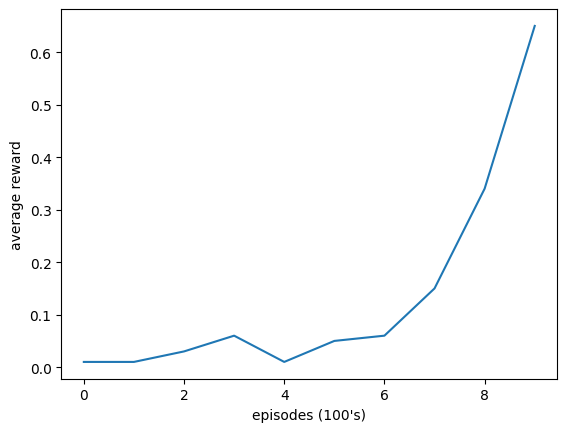

In [11]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

##Sources
1. Violante, Andre. “Simple Reinforcement Learning: Q-Learning.” Medium, Towards Data Science, 1 July 2019, https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56.

2. Openai. “Openai/Gym.” GitHub, https://github.com/openai/gym/wiki/FrozenLake-v0.